**Data Description:**

The "Players" data set contains the following variables.
Each row corresponds to one Minecraft player who played on the server.
There are 196 rows of data.
- experience(chr): classifies the player by their level of experience. The classes are: Beginner, Amateur, Regular, Veteran, Pro.
- subscribe(lgl): whether or not the player is subscribed to the PLAICraft newsletter.
- hashedEmail(chr): the email address of the player, which has been hashed for privacy.
- played_hours(dbl): the number of hours the player has played on the PLAICraft server, as a float. NOTE: Many players have logged 0.0 hours in the server.
- name(chr): The real-life first name of the player. NOTE: some names are typed out with unusual characters, such as SebastiÃ¡n or ThÃ©o.
- gender(chr): The gender of the player. Values present in the data set are: Male, Female, Non-binary, Prefer not to say, Agender, Two-Spirit, and Other.
- Age(dbl): the age of the player. NOTE: One value is missing (NA).

The "Sessions" data set contains the following variables.
Each row represents one play session logged on the server.
There are 1535 rows of data.
- hashedEmail(chr): the email address of the player, hashed for privacy. NOTE: Because multiple session can be logged by one player, distinct values may appear multiple times.
- start_time(chr): the start time of the play session, in DD/MM/YYYY HH:MM format. NOTE: Some data represents the time of day in HH:MM:SS AM/PM format instead. Dates range from April to September 2024.
- end_time(chr): the end time of the play session, in DD/MM/YYYY HH:MM format. NOTE: Some data represents the time of day in HH:MM:SS AM/PM format instead. Dates range from April to September 2024.
- original_start_time(dbl): the start time of the play session represented as a 13-digit number (UNIX format). NOTE: these values are rounded, making them useless.
- original_end_time(dbl): the end time of the play session represented as a 13-digit number (UNIX format). NOTE: these values are rounded, making them useless. NOTE: Some rows are missing values.

**Questions**

Broad question: 

Question 3: We are interested in demand forecasting, namely, what time windows are most likely to have large number of simultaneous players. This is because we need to ensure that the number of licenses on hand is sufficiently large to accommodate all parallel players with high probability. 

Specific question:

Can the day of the week predict the number of play sessions in the sessions data set?

We can use start_time to assign each play session to a day of the week. We can count the frequency of play sessions that occured on the day of the week using start_time and end_time (we need both in case the session took place in two days - more details on that in part 3).

**Exploratory Data Analysis and Visualization**

In [1]:
players_url <- 'https://raw.githubusercontent.com/AustinJLHart/dsci-100-project-demo/refs/heads/main/players.csv'
session_url <- 'https://raw.githubusercontent.com/AustinJLHart/dsci-100-project-demo/refs/heads/main/sessions.csv'
library(tidyverse)
session_data <- read_csv(session_url)
players_data <- read_csv(players_url)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter:

In [2]:
# To tidy the data, we simply remove the rows with NA values, which luckily does not remove very many rows.
players_tidy <- na.omit(players_data)
players_tidy

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [9]:
# There are no NA values present in the sessions data, so to tidy the session data we remove original_start_time and original_end_time.
# These columns are making the data untidy because they are missing values, despite the corresponding start_time and end_time values being present.
# Since the data is useless in these columns anyways, we can just remove them.
session_tidy <- session_data |>
    select(-original_start_time, -original_end_time)
session_tidy

hashedEmail,start_time,end_time
<chr>,<chr>,<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49


In [4]:
players_mean <- players_tidy |>
    summarize(mean_hours = mean(played_hours),
              mean_age = mean(Age))
players_mean

mean_hours,mean_age
<dbl>,<dbl>
5.904639,20.52062


In [5]:
session_fixed <- session_tidy |>
    mutate(start_date = as.Date(start_time, format = '%d / %m / %Y'))

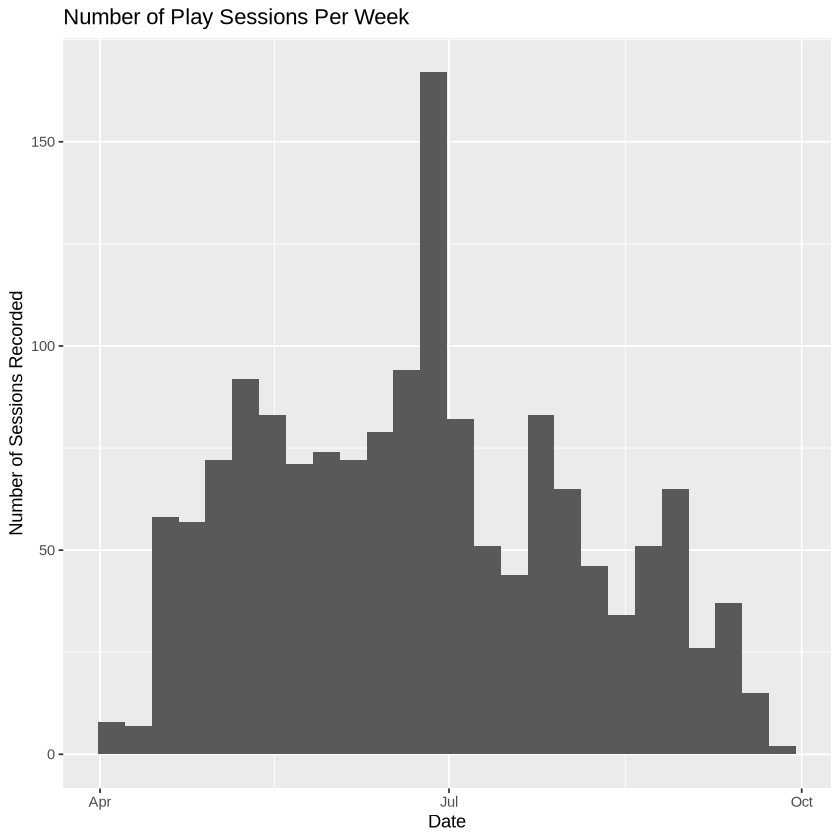

In [6]:
session_plot <- session_fixed |>
    ggplot(aes(x = start_date)) +
    geom_histogram(binwidth = 7) +
    labs(x = 'Date', y = 'Number of Sessions Recorded', title = 'Number of Play Sessions Per Week')
session_plot

We can see that all sessions are recorded between April and late September, and that it seems most sessions occured in late June.

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


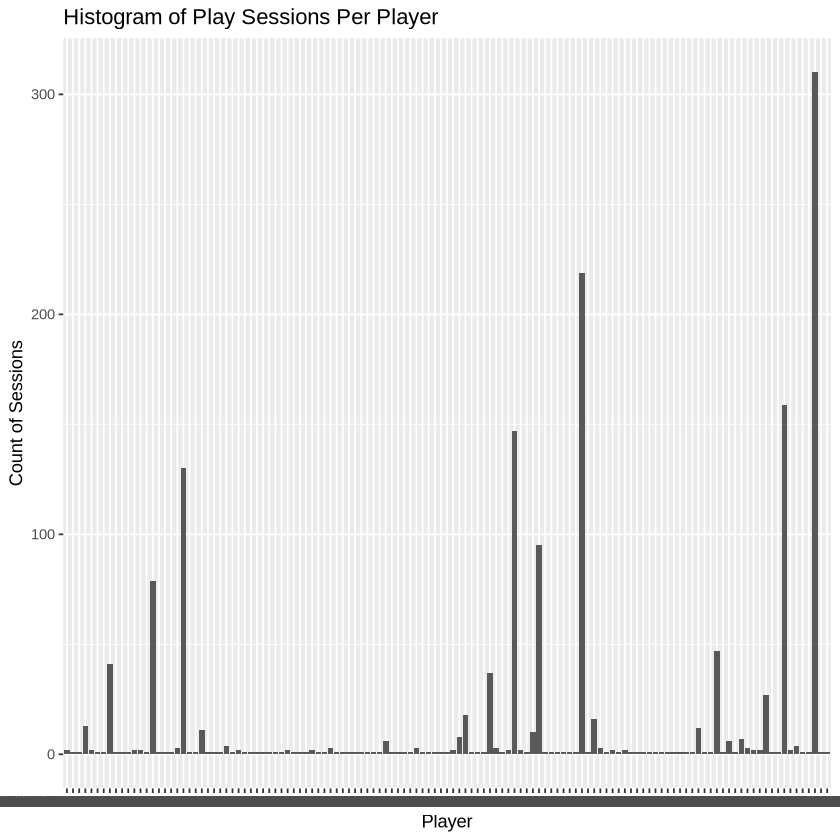

In [7]:
session_plot_2 <- session_fixed |>
    ggplot(aes(x = hashedEmail)) +
    geom_histogram(stat = 'count') +
    labs(x = 'Player', y = 'Count of Sessions', title = 'Histogram of Play Sessions Per Player')
session_plot_2

As we can see, most players record very few sessions, but some record very very many. It seems that one player recorded more sessions than there are days in the period of data recording...

**Method and plan**

We can use the as.Date() function and the weekdays() function to make new columns for the date and the day of the week for each play session.

From there, we can make a count of the play sessions that occured on each day. We can use this data to make a new data frame, where there is a column for each day of the week, rows represent one week of recorded sessions, and the data values are the number of play sessions recorded on that day of that week. Then, we calculate the mean values for each column in the data set to find the average expected play sessions per day of the week and present this as a bar graph.

BUT: What if the play session took place on more than one day?

There's two ways to solve this:

1: We can perform a check to see if the start and end time are in different days. If so, we split the session into two sessions, one for each day.

2: If this proves too difficult, we could ignore end_time and just use the start_time to date the session. It seems from looking at the data set that this mostly occurs when people start a play session late in the evening and play past midnight. We can assume that the volume of players playing in the early AM is not as significant and not worth analyzing. In this case, we can just extract the date from the start_time values.

In [8]:
# here is a demonstration of how day of the week can be determined based on start_time.
session_test <- session_tidy |>
    mutate(date = as.Date(start_time, format = '%d / %m / %Y')) |>
    arrange(date) |>
    mutate(weekday = weekdays(date)) |>
    select(hashedEmail, start_time, end_time, date, weekday)
session_test

hashedEmail,start_time,end_time,date,weekday
<chr>,<chr>,<chr>,<date>,<chr>
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,06/04/2024 22:24,06/04/2024 23:33,2024-04-06,Saturday
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,06/04/2024 09:35,06/04/2024 10:16,2024-04-06,Saturday
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,06/04/2024 09:27,06/04/2024 09:31,2024-04-06,Saturday
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,06/04/2024 20:56,06/04/2024 22:04,2024-04-06,Saturday
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,07/04/2024 00:17,07/04/2024 00:28,2024-04-07,Sunday
5baba1651a0b92788bc0d6dcdf00be64af1cf9f0015bbeed204ddabd1d872e83,07/04/2024 05:47,07/04/2024 06:30,2024-04-07,Sunday
119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,07/04/2024 05:40,07/04/2024 06:30,2024-04-07,Sunday
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,07/04/2024 02:08,07/04/2024 03:35,2024-04-07,Sunday
fb0005032363ec3b30c2ae668f78f5076b7e77de0c6a249e924eee608cd0a1fa,08/04/2024 08:10,08/04/2024 08:46,2024-04-08,Monday


**Why is this method appropriate?**

This method is appropriate because it represents the number of sessions we can expect on a given day of the week. This information can be easily used to present the most popular and least popular days, as well as the relative proportions of sessions per day. This will be useful for the purpose of demand forecasting.

**Which assumptions are required, if any, to apply the method selected?**

As described above, we may have to assume that sessions start and end on the same day.

**What are the potential limitations or weaknesses of the method selected?**

We only have data for summer months. This may skew the data. Also, the period of data collection did not start and end on the same day of the week, meaning some days have more observations than others. This shouldn't be a problem though.

**How are you going to compare and select the model?**

Comparing models is not necessary for my proposed solution.

**How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?**

The data will be split into a training and testing data set so that the predictions made can be analyzed. The proportion for the split will be the standard 75%, and they will be split after the data set has been modified to include the proper formatting for the date and an extra column for day of the week. This testing set will be used to calculate the RMSPE.
Since we are not comparing models, cross validation will not be used.